In [36]:
import torch
import mx
from mx.mx_ops import quantize_mx_op, get_mx_quantize_params, apply_mx_quantize_with_param
from mx.elemwise_ops import quantize_elemwise_op
from mx.specs import MxSpecs
import numpy as np
import matplotlib.pyplot as plt
from fast_hadamard_transform import hadamard_transform
import math
def plot_3d_matrix(matrix,
                   title='3D Surface Plot',
                   xlabel='Channel',
                   ylabel='Token',
                   zlabel='Intensity',
                   cmap='coolwarm',
                   zlim=None):
    """
    将输入的矩阵进行 3D 可视化。

    参数:
    matrix: 2D numpy 数组 或 torch.Tensor，表示要可视化的矩阵
    xlabel: X 轴的标签
    ylabel: Y 轴的标签
    zlabel: Z 轴的标签
    cmap: 颜色映射，默认 'coolwarm'
    """
    # 如果输入是 torch.Tensor，转换为 numpy.ndarray
    if isinstance(matrix, torch.Tensor):
        matrix = matrix.numpy()

    # 确保输入是二维矩阵
    if not isinstance(matrix, np.ndarray) or matrix.ndim != 2:
        raise ValueError("输入必须是一个二维矩阵（numpy array 或 torch tensor）。")

    M, N = matrix.shape
    X = np.arange(N)
    Y = np.arange(M)
    X, Y = np.meshgrid(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 绘制 3D 表面图
    ax.plot_surface(X, Y, matrix, cmap=cmap)

    # 设置z轴范围
    if zlim is not None:
        ax.set_zlim(zlim[0], zlim[1])
    # 设置坐标轴标签
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.title.set_text(title)

    plt.show()


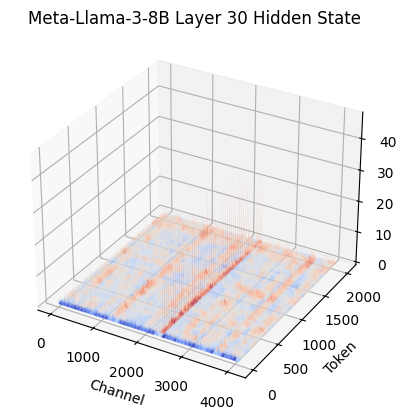

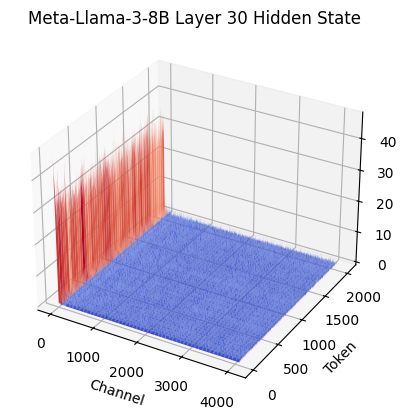

In [76]:
lq_id = 30
l0_qin = torch.load(f'/home/shaoyuantian/program/MXFP4-LLM/hidden_state_samples/Meta-Llama-3-8B-layer-{lq_id}-r1.pt',
                     map_location='cpu').squeeze(0).float()
plot_3d_matrix(l0_qin.abs(),
               title=f'Meta-Llama-3-8B Layer {lq_id} Hidden State',
               xlabel='Channel',
               ylabel='Token',
               zlabel='Intensity',
               cmap='coolwarm')
l0_qin_idx = torch.load("/home/shaoyuantian/program/MXFP4-LLM/sorting_index/Meta-Llama-3-8B-sorted-idx.pt",
                        map_location='cpu')["R1"]
plot_3d_matrix(l0_qin.abs()[:, l0_qin_idx],
               title=f'Meta-Llama-3-8B Layer {lq_id} Hidden State',
               xlabel='Channel',
               ylabel='Token',
               zlabel='Intensity',
               cmap='coolwarm',
               )

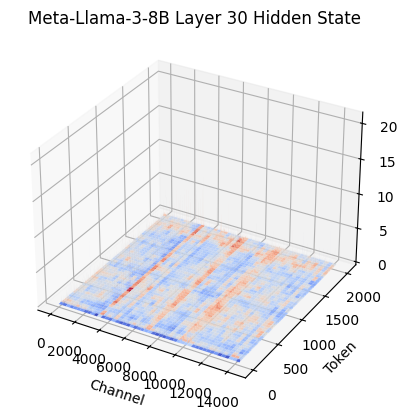

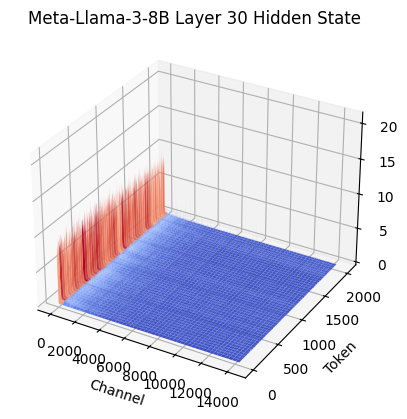

In [81]:
l_id = 30
l1_din = torch.load(f'/home/shaoyuantian/program/MXFP4-LLM/hidden_state_samples/Meta-Llama-3-8B-layer-{l_id}-r4.pt',
                        map_location='cpu').squeeze(0).float()
l1_din_idx = torch.load("/home/shaoyuantian/program/MXFP4-LLM/sorting_index/Meta-Llama-3-8B-sorted-idx.pt",
                        map_location='cpu')[f"model.layers.{l_id}.self_attn.R4"]
plot_3d_matrix(l1_din.abs(),
               title=f'Meta-Llama-3-8B Layer {l_id} Hidden State',
               xlabel='Channel',
               ylabel='Token',
               zlabel='Intensity',
               cmap='coolwarm',
               )
plot_3d_matrix(l1_din.abs()[:, l1_din_idx],
                title=f'Meta-Llama-3-8B Layer {l_id} Hidden State',
                xlabel='Channel',
                ylabel='Token',
                zlabel='Intensity',
                cmap='coolwarm',
                )

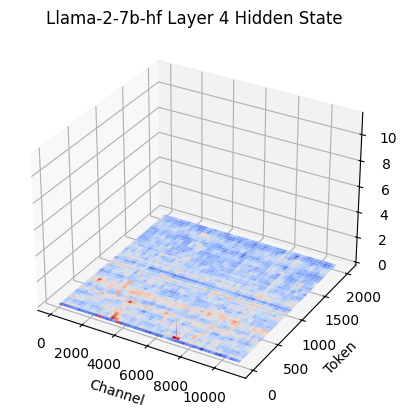

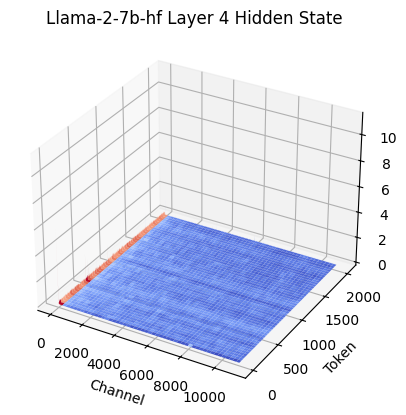

In [80]:
l_id = 4
l1_din = torch.load(f'/home/shaoyuantian/program/MXFP4-LLM/hidden_state_samples/Llama-2-7b-hf-layer-{l_id}-r4.pt',
                        map_location='cpu').squeeze(0).float()
l1_din_idx = torch.load("/home/shaoyuantian/program/MXFP4-LLM/sorting_index/Llama-2-7b-hf-mean-sorted-idx.pt",
                        map_location='cpu')[f"model.layers.{l_id}.self_attn.R4"]
plot_3d_matrix(l1_din.abs(),
               title=f'Llama-2-7b-hf Layer {l_id} Hidden State',
               xlabel='Channel',
               ylabel='Token',
               zlabel='Intensity',
               cmap='coolwarm',
               )
plot_3d_matrix(l1_din.abs()[:, l1_din_idx],
                title=f'Llama-2-7b-hf Layer {l_id} Hidden State',
                xlabel='Channel',
                ylabel='Token',
                zlabel='Intensity',
                cmap='coolwarm',
                )